Title of ML Project: Comparative Study of Machine Learning Algorithms for Probability of Default of Credit Card Clients.

Name: Kirstin Susan George

Organization: Entri Elevate

Date: [Evaluation Date]


**1.** **Overview of Problem Statement**

**Credit card default risk** is a major problem for banks and other financial institutions in the current financial environment. In order for successful **credit risk management**, **loan portfolio optimization**, and **regulatory compliance** (e.g., Basel III requirements), it is essential to accurately estimate the **probability of default (PD)**, or the likelihood that a client will not make the required credit card payments.

**Machine learning (ML) algorithms** have become increasingly effective tools for enhancing risk assessment and predicting accuracy as a result of the growing availability of **large-scale transactional, demographic, and behavioral data**.

**2. Objective**

The purpose of this study is to compare several ML algorithms in order to ascertain which method best forecasts the likelihood that **credit card customers would default**.

**3. Data Description**


●	**Source**: UCI MAchine Learning Repository, Excel Sheet file.

●	**Features**:
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

**X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
X6 = the repayment status in September, 2005;
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005.

**The measurement scale for the repayment status is**:
-1 = pay duly;
1 = payment delay for one month;
2 = payment delay for two months; . . .;
8 = payment delay for eight months;
9 = payment delay for nine months and above.

**X12-X17**: Amount of bill statement (NT dollar).
X12 = amount of bill statement in September, 2005;
X13 = amount of bill statement in August, 2005; . . .;
X17 = amount of bill statement in April, 2005.

**X18-X23**: Amount of previous payment (NT dollar).
X18 = amount paid in September, 2005;
X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005.

●	**Target** Variable: Y = deafult payment next month.

**4. Data Preprocessing & Cleaning**

**Handling Missing Values**
* **Detection:**
  The dataset was examined for missing or null values using summary statistics and data visualization tools such as heatmaps and missing value counts.

* **Treatment:**
  Depending on the nature and proportion of missing data:

  * **Numerical features** (e.g., credit limit, bill amounts, payment amounts) were imputed using **mean or median values** to preserve data distribution.
  * **Categorical features** (e.g., gender, education, marital status) were imputed using the **mode** (most frequent category).
  * If any feature had an excessive proportion of missing data (e.g., more than 30%), it was **considered for removal** to avoid bias.

  There are **no missing values** in the dataset.

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.impute import SimpleImputer

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Assignments/ML_PROJECT-OCT/default-of-credit-card-clients.csv'
df = pd.read_csv(file_path, delimiter=',', skiprows=[1])
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X15    X16  \
0           1   20000   2   2   1  24   2   2  -1  -1  ...      0      0   
1           2  120000   2   2   2  26  -1   2   0   0  ...   3272   3455   
2           3   90000   2   2   2  34   0   0   0   0  ...  14331  14948   
3           4   50000   2   2   1  37   0   0   0   0  ...  28314  28959   
4           5   50000   1   2   1  57  -1   0  -1   0  ...  20940  19146   

     X17   X18    X19    X20   X21   X22   X23  Y  
0      0     0    689      0     0     0     0  1  
1   3261     0   1000   1000  1000     0  2000  1  
2  15549  1518   1500   1000  1000  1000  5000  0  
3  29547  2000   2019   1200  1100  1069  1000  0  
4  19131  2000  36681  10000  9000   689   679  0  

[5 rows x 25 columns]


**Outlier Detection and Removal**

* **Identification:**
  Outliers were identified using both **statistical** and **visualization methods**:

  * **Z-score** and **Interquartile Range (IQR)** methods were applied to numerical variables to detect extreme values.
  * **Boxplots** and **scatter plots** were used for visual confirmation of anomalies.
* **Treatment:**

  * Outliers that were a result of **data entry errors** or unrealistic values were **removed or capped** (e.g., using winsorization).
  * Legitimate but extreme financial values were retained if they represented genuine high-risk or high-credit clients, as they can carry meaningful information for credit risk prediction.

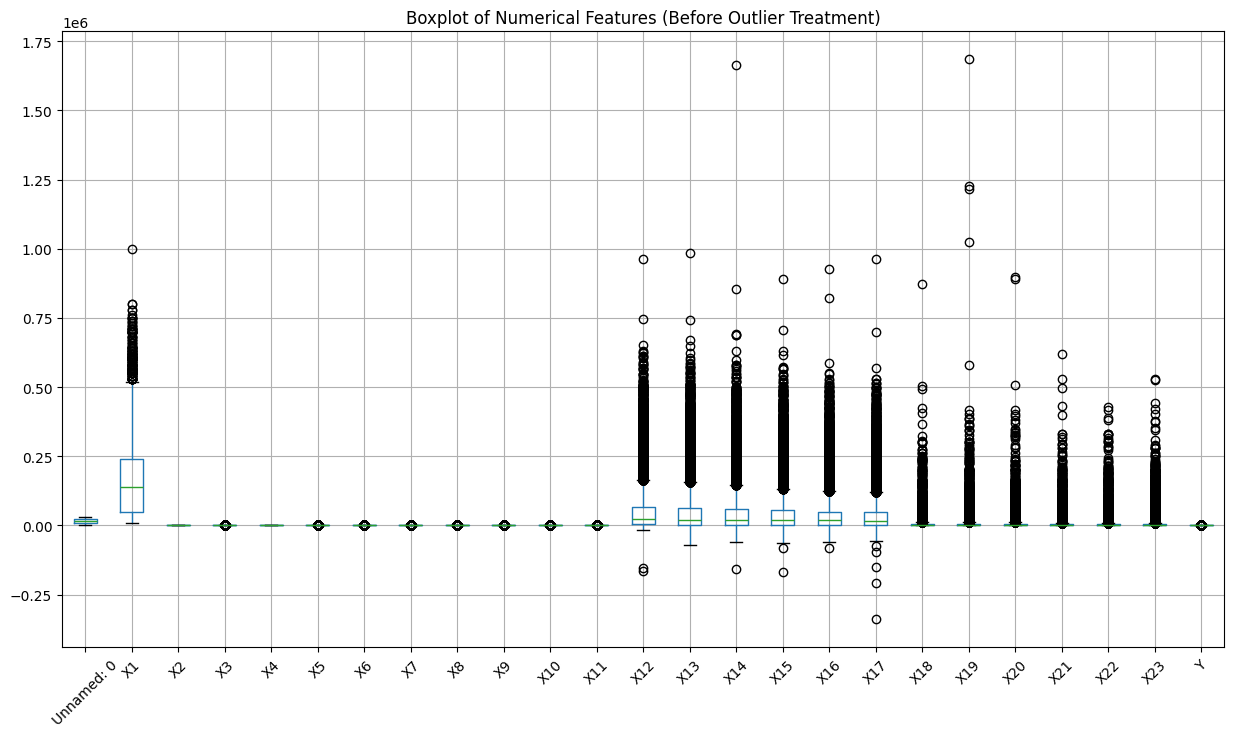

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.title("Boxplot of Numerical Features (Before Outlier Treatment)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def remove_outliers_iqr(data, cols):
    df_clean = data.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap extreme outliers instead of dropping (optional)
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
        df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])
    return df_clean

df_iqr = remove_outliers_iqr(df, num_cols)


In [ ]:
def remove_outliers_zscore(data, cols, threshold=3):
    df_clean = data.copy()
    for col in cols:
        z = np.abs(stats.zscore(df_clean[col]))
        df_clean = df_clean[z < threshold]
    return df_clean

df_zscore = remove_outliers_zscore(df, num_cols)

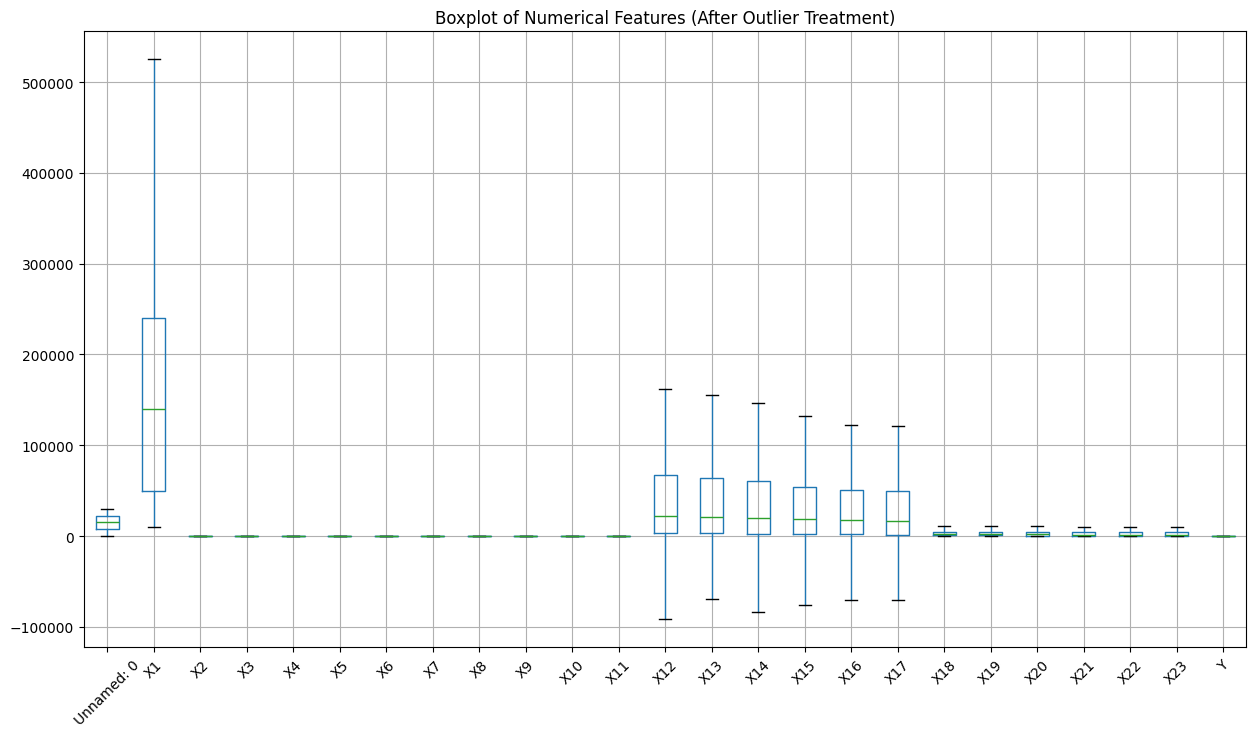

Before removing outliers: (30000, 25)
After removing/capping outliers: (30000, 25)


In [ ]:
plt.figure(figsize=(15, 8))
df_iqr[num_cols].boxplot()
plt.title("Boxplot of Numerical Features (After Outlier Treatment)")
plt.xticks(rotation=45)
plt.show()

print("Before removing outliers:", df.shape)
print("After removing/capping outliers:", df_iqr.shape)

**Encoding Categorical Variables**

* There was **no need for transformation/conversion** as it was already provided as per our requirement in the dataset.

**Addressing Skewness in Numerical Features**

* **Skewness Detection:**
  Distribution plots and skewness coefficients were examined for each numerical variable (e.g., bill amount, payment amount, credit limit).

* **Transformation Techniques:**

  * **Logarithmic or Box-Cox transformations** were applied to reduce right-skewed distributions (common in financial data).
  * Features with zero or negative values were adjusted (e.g., adding a constant before log transformation).
  * Normalization or **standard scaling (Z-score normalization)** was applied to ensure all features had comparable scales for algorithms sensitive to magnitude differences (e.g., SVM, KNN).


Skewness before transformation:
 Unnamed: 0     0.000000
X1             0.992817
X2            -0.424162
X3             0.970923
X4            -0.018741
X5             0.732209
X6             0.731938
X7             0.790525
X8             0.840640
X9             0.999579
X10            1.008147
X11            0.947982
X12            2.663728
X13            2.705086
X14            3.087676
X15            2.821824
X16            2.876236
X17            2.846502
X18           14.667631
X19           30.452295
X20           17.215775
X21           12.904340
X22           11.126861
X23           10.640195
Y              1.343437
dtype: float64


<Figure size 1500x800 with 0 Axes>

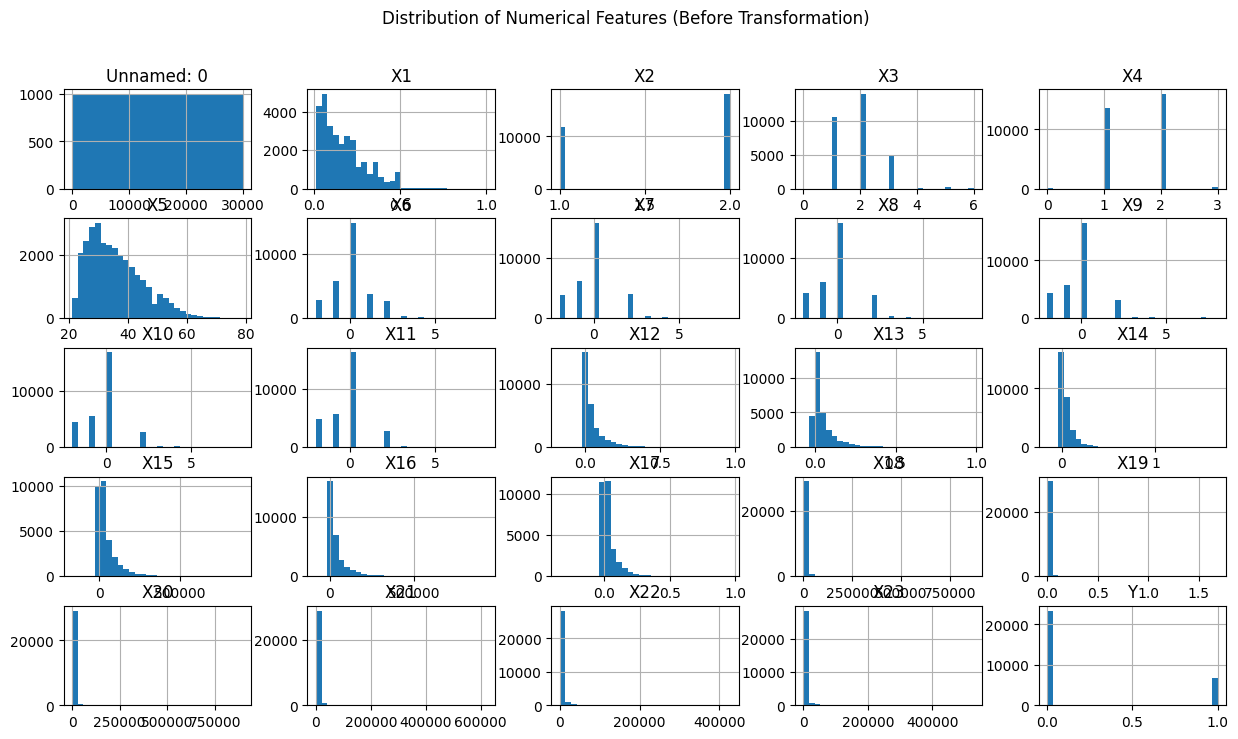


Skewness after transformation:
 Unnamed: 0     0.000000
X1             0.992817
X2            -0.424162
X3             0.970923
X4            -0.018741
X5             0.732209
X6             0.731938
X7             0.790525
X8             0.840640
X9             0.999579
X10           -0.353987
X11            0.947982
X12           -1.030113
X13            0.680473
X14           -0.995773
X15           -1.812186
X16            0.553917
X17          -15.571842
X18           -1.227982
X19           -1.174199
X20           -1.012411
X21           -0.898224
X22           -0.875283
X23           -0.793695
Y              1.343437
dtype: float64


<Figure size 1500x800 with 0 Axes>

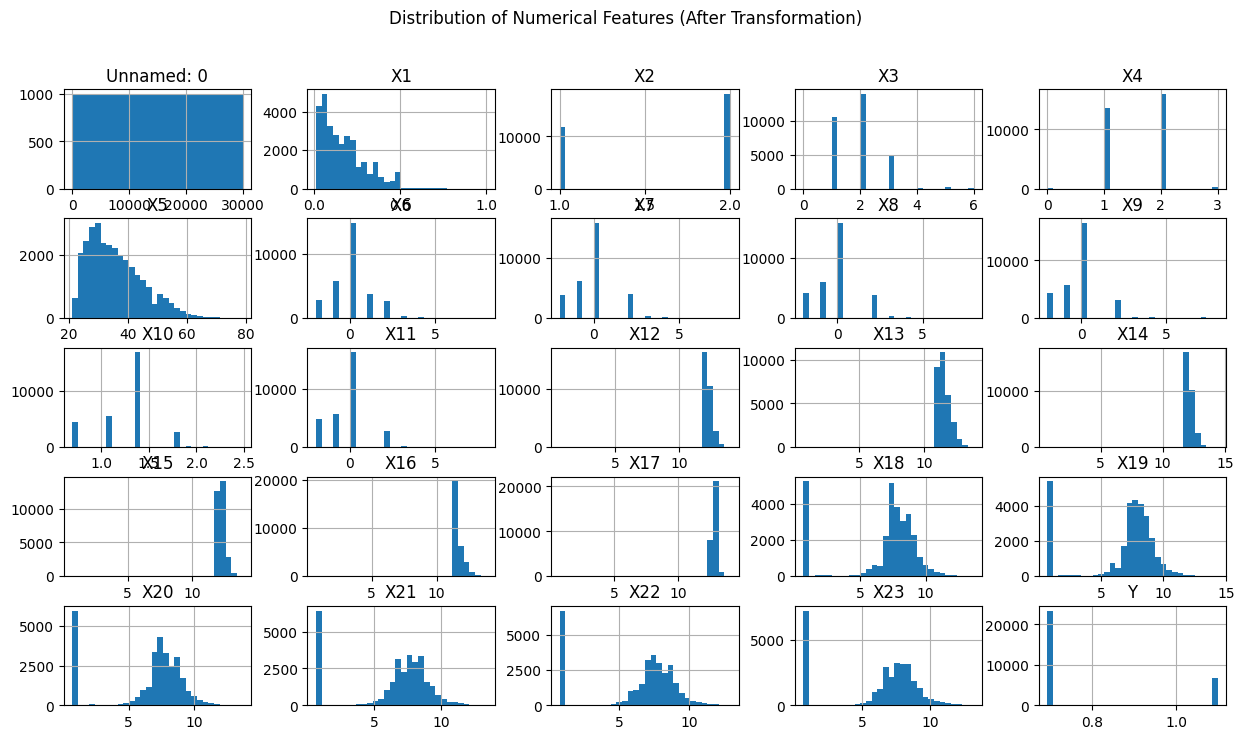


Dataset ready for modeling. Shape: (30000, 25)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, skew

df = pd.read_csv("credit_card_default_clean.csv")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

skew_values = df[num_cols].apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skew_values)


plt.figure(figsize=(15, 8))
df[num_cols].hist(bins=30, figsize=(15, 8))
plt.suptitle("Distribution of Numerical Features (Before Transformation)")
plt.show()

df_transformed = df.copy()

for col in num_cols:
    if abs(skew_values[col]) > 1:  # threshold for high skewness
        # Handle negative or zero values safely before log transform
        if (df_transformed[col] <= 0).any():
            # Apply Box-Cox only for positive data, otherwise use log1p (log(x+1))
            df_transformed[col] = np.log1p(df_transformed[col] - df_transformed[col].min() + 1)
        else:
            # Use Box-Cox transformation (requires strictly positive values)
            df_transformed[col], _ = boxcox(df_transformed[col])

new_skew = df_transformed[num_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness after transformation:\n", new_skew)


plt.figure(figsize=(15, 8))
df_transformed[num_cols].hist(bins=30, figsize=(15, 8))
plt.suptitle("Distribution of Numerical Features (After Transformation)")
plt.show()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_transformed[num_cols] = scaler.fit_transform(df_transformed[num_cols])


print("\nDataset ready for modeling. Shape:", df_transformed.shape)


**5. Exploratory Data Analysis (EDA)**

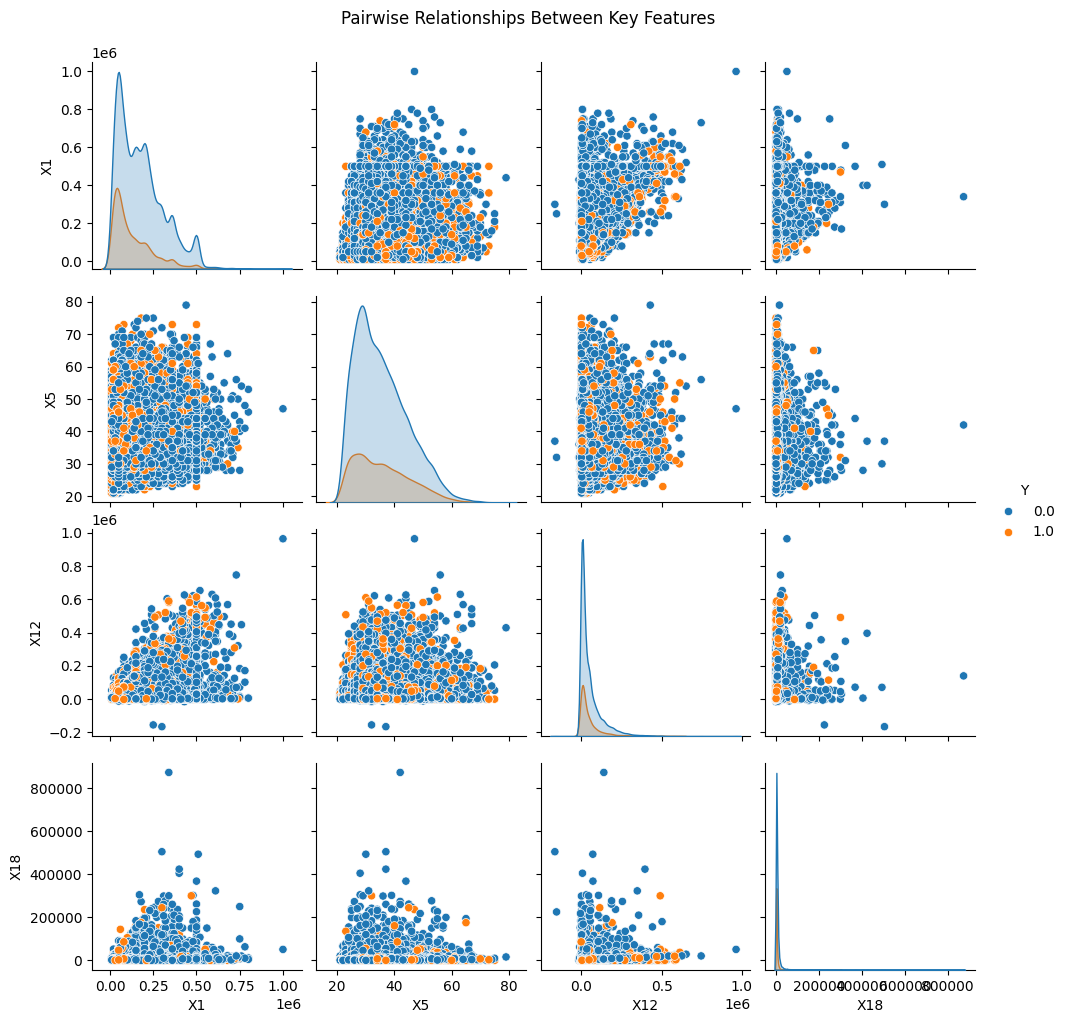

In [ ]:
# RELATIONSHIP_PAIRPOLT
sns.pairplot(df[['X1', 'X5', 'X12', 'X18', 'Y']],
             hue='Y', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()

* Noticable difference exists between the spending and payment behaviours of defaulters and non-defaulters.

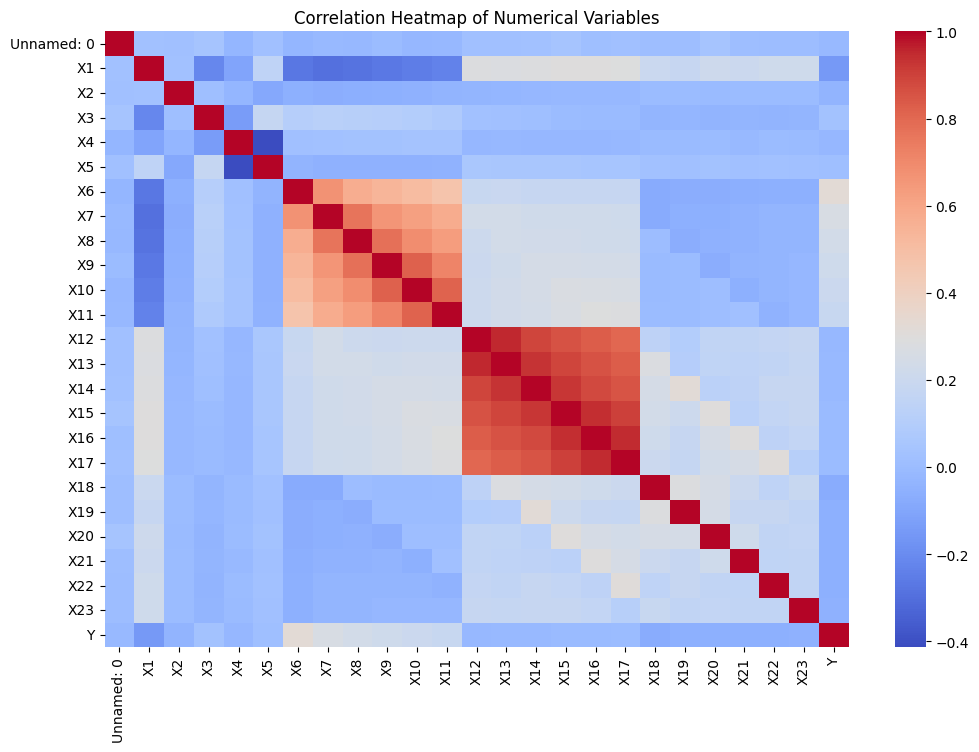

In [ ]:
# HEATMAP
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

* Strong positive correlations between consecutive bill amount features (X12 and X13)
* X1 (Limit_bal) has a weak negative correlation with deafult probability - clients with higher limit are less likely to default.

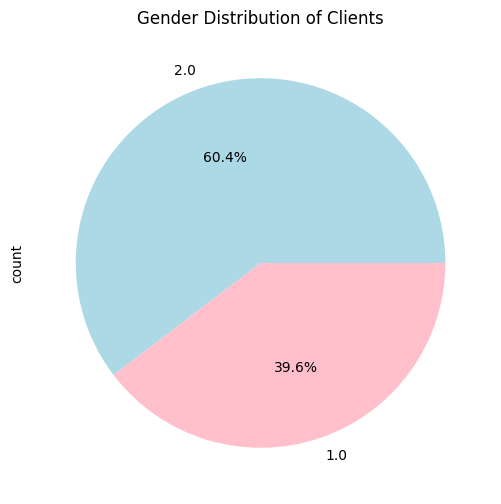

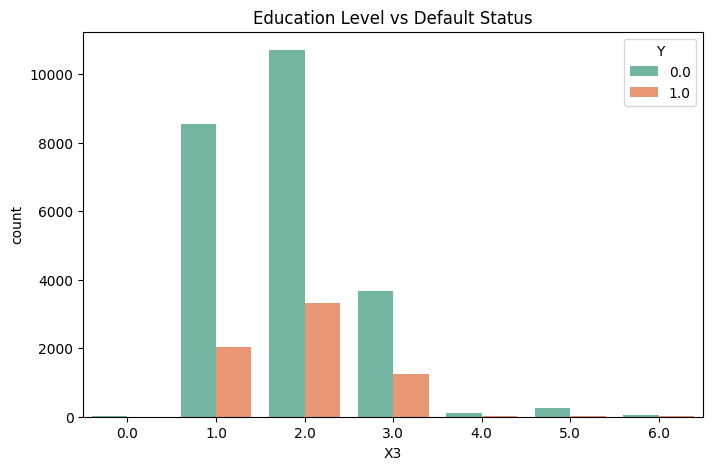

In [ ]:
plt.figure(figsize=(6, 6))
df['X2'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution of Clients")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='X3', hue='Y', data=df, palette='Set2')
plt.title("Education Level vs Default Status")
plt.show()

* **Female** clients outnumber male clients in the dataset.
* Clients with **graduate or university-level** education form the majority.

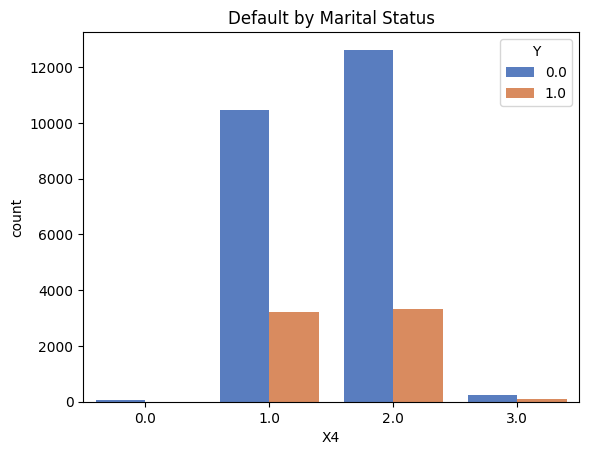

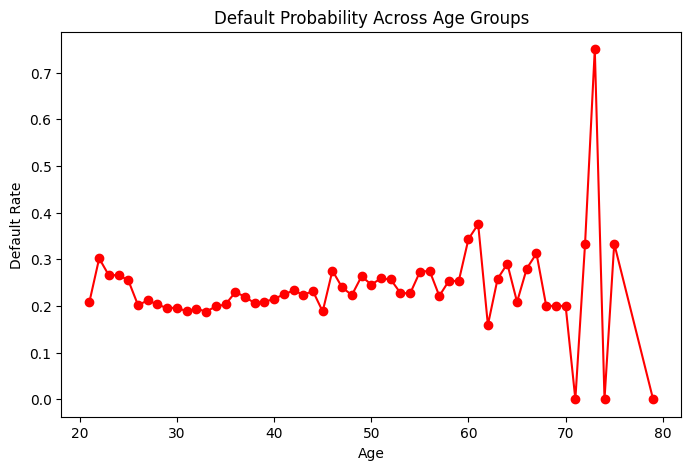

In [ ]:
# Default_Trend_analysis(Bar and Line polt)
sns.countplot(x='X4', hue='Y', data=df, palette='muted')
plt.title("Default by Marital Status")
plt.show()


age_default = df.groupby('X5')['Y'].mean()
age_default.plot(kind='line', figsize=(8, 5), marker='o', color='red')
plt.title("Default Probability Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Default Rate")
plt.show()

* **Single** clients show a slightly higher defaukt tendency compared to married clients.
* Default probabilty **decreases with age**.

/tmp/ipython-input-568183483.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Y'] == 0]['X1'], label='No Default', shade=True)
/tmp/ipython-input-568183483.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Y'] == 1]['X1'], label='Default', shade=True)


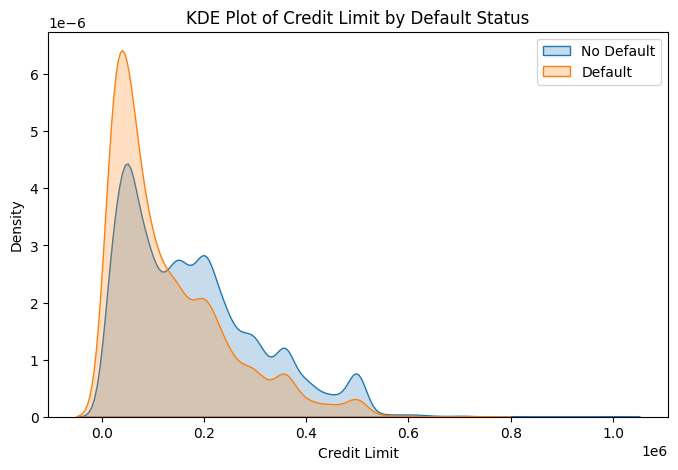

In [ ]:
#KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Y'] == 0]['X1'], label='No Default', shade=True)
sns.kdeplot(df[df['Y'] == 1]['X1'], label='Default', shade=True)
plt.title("KDE Plot of Credit Limit by Default Status")
plt.xlabel("Credit Limit")
plt.legend()
plt.show()

* Non-Defaulters have **higher credit** limit with tighter distribution.
* **Lower and more spread out limits** for defaults.
* **Defaulters** tend to have lower credit limit, younger age, and higher utstanding balances.

**6. Feature Engineering**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", cat_cols.tolist())

ordinal_features = ['X3', 'X4']
le = LabelEncoder()
for col in ordinal_features:
    df[col] = le.fit_transform(df[col])

nominal_features = ['X2']
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

print("Data after encoding:", df.shape)

Categorical Columns: []
Data after encoding: (30000, 25)


In [ ]:
df['UTILIZATION_RATIO'] = (df['X12'] / df['X1']).clip(0, 1)

bill_features = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']
df['AVG_BILL_AMT'] = df[bill_features].mean(axis=1)

pay_features = ['X18', 'X19', 'X20', 'X21', 'X22', 'X23']
df['AVG_PAY_AMT'] = df[pay_features].mean(axis=1)

df['PAYMENT_RATIO'] = (df['AVG_PAY_AMT'] / (df['AVG_BILL_AMT'] + 1)).clip(0, 1)

delay_features = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
df['TOTAL_DELAY'] = df[delay_features].apply(lambda x: (x > 0).sum(), axis=1)

df = df.drop(columns=bill_features + pay_features)

In [ ]:
X = df.drop(columns=['Y'])
y = df['Y']

print("Final feature matrix shape:", X.shape)
print("Target variable distribution:\n", y.value_counts(normalize=True))

Final feature matrix shape: (30000, 17)
Target variable distribution:
 Y
0.0    0.7788
1.0    0.2212
Name: proportion, dtype: float64


**7. Feature Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X = df.drop(columns=['Y'])
y = df['Y']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler_standard = StandardScaler()
X_standard = X.copy()
X_standard[num_cols] = scaler_standard.fit_transform(X[num_cols])

scaler_minmax = MinMaxScaler()
X_minmax = X.copy()
X_minmax[num_cols] = scaler_minmax.fit_transform(X[num_cols])

scaler_robust = RobustScaler()
X_robust = X.copy()
X_robust[num_cols] = scaler_robust.fit_transform(X[num_cols])

print("Original Feature Range (Credit Limit):", (X['X1'].min(), X['X1'].max()))
print("After StandardScaler:", (X_standard['X1'].min(), X_standard['X1'].max()))
print("After MinMaxScaler:", (X_minmax['X1'].min(), X_minmax['X1'].max()))
print("After RobustScaler:", (X_robust['X1'].min(), X_robust['X1'].max()))


Original Feature Range (Credit Limit): (10000.0, 1000000.0)
After StandardScaler: (-1.2137941105738403, 6.416528381980181)
After MinMaxScaler: (0.0, 1.0)
After RobustScaler: (-0.6842105263157895, 4.526315789473684)


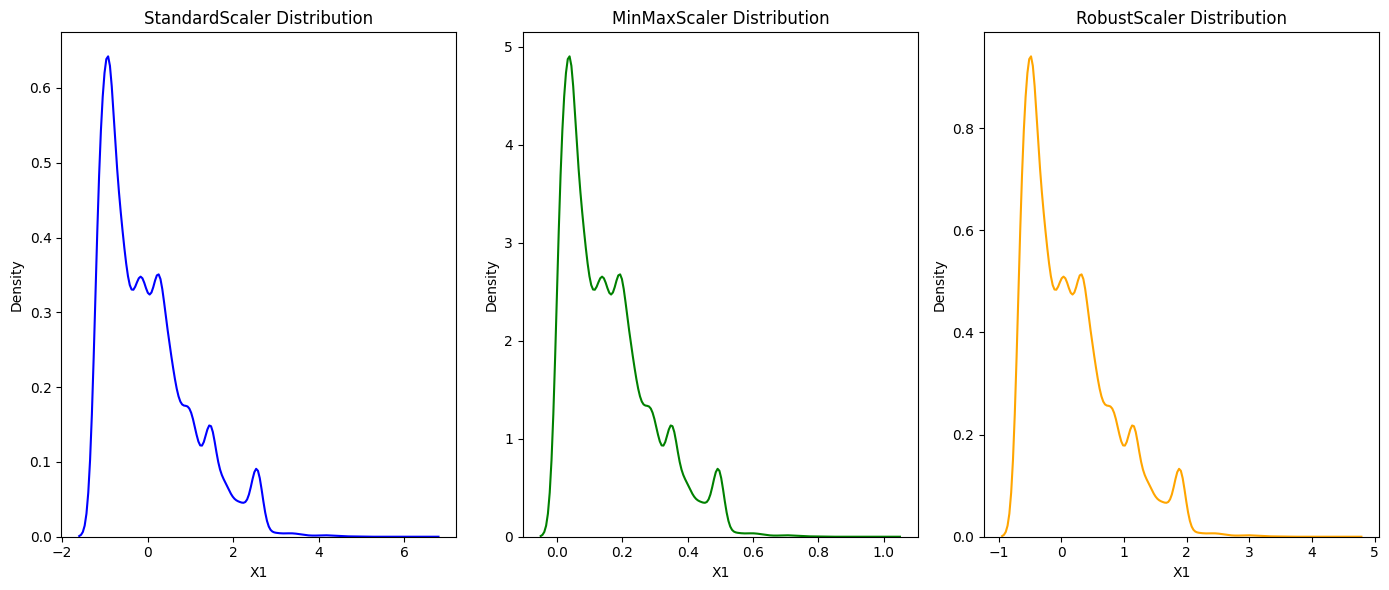

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(X_standard['X1'], color='blue')
plt.title("StandardScaler Distribution")

plt.subplot(1, 3, 2)
sns.kdeplot(X_minmax['X1'], color='green')
plt.title("MinMaxScaler Distribution")

plt.subplot(1, 3, 3)
sns.kdeplot(X_robust['X1'], color='orange')
plt.title("RobustScaler Distribution")

plt.tight_layout()
plt.show()

**8. Model Building**

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Assignments/ML_PROJECT-OCT/default-of-credit-card-clients.csv'
df = pd.read_csv(file_path, delimiter=',', skiprows=[1])
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0      X1  X2  X3  X4  X5  ...    X19    X20   X21   X22   X23  Y
0           1   20000   2   2   1  24  ...    689      0     0     0     0  1
1           2  120000   2   2   2  26  ...   1000   1000  1000     0  2000  1
2           3   90000   2   2   2  34  ...   1500   1000  1000  1000  5000  0
3           4   50000   2   2   1  37  ...   2019   1200  1100  1069  1000  0
4           5   50000   1   2   1  57  ...  36681  10000  9000   689   679  0

[5 rows x 25 columns]


In [ ]:
X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
Support Vector Machine trained successfully!

Logistic Regression Performance:
Accuracy: 0.8073
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4673
           1       0.72      0.21      0.33      1327

    accuracy                           0.81      6000
   macro avg       0.77      0.59      0.61      6000
weighted avg       0.79      0.81      0.76      6000


Decision Tree Performance:
Accuracy: 0.7258
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.39      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000


Random Forest Performance:
Accuracy: 0.8147


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**9. Model Evaluation**


=== Model Performance Summary ===
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2    Gradient Boosting  0.819333   0.668516  0.363225  0.470703  0.779022
1        Random Forest  0.814167   0.639108  0.366993  0.466252  0.761043
3                  SVM  0.816667   0.669656  0.337604  0.448898  0.724140
0  Logistic Regression  0.808000   0.688172  0.241145  0.357143  0.707777


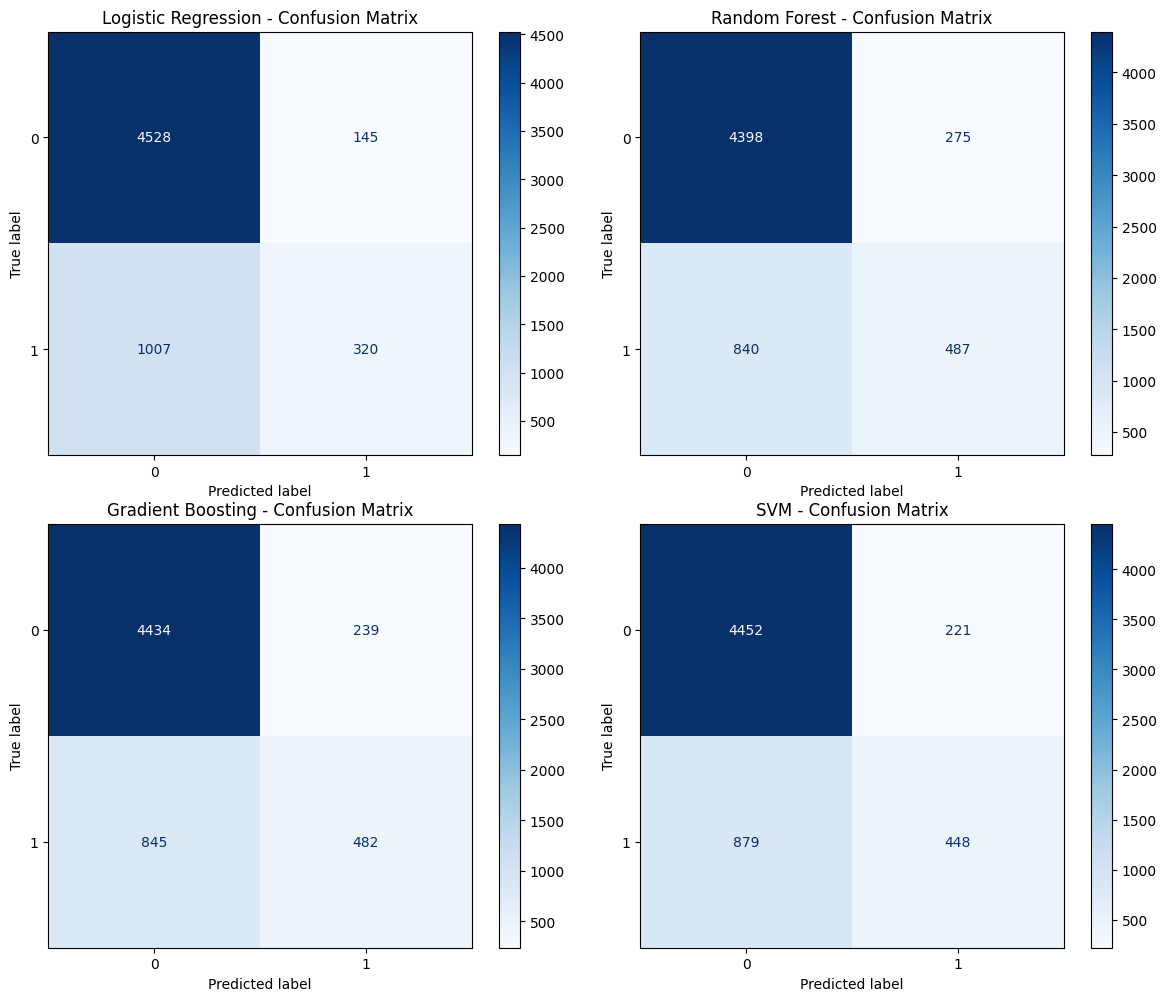

<Figure size 800x600 with 0 Axes>

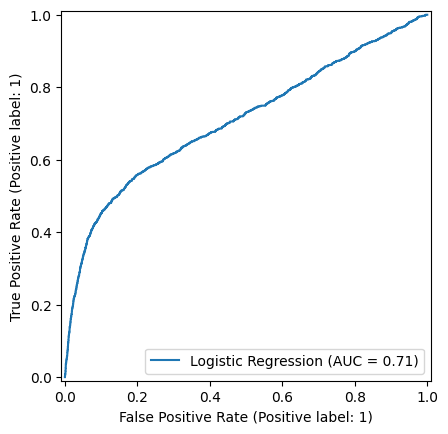

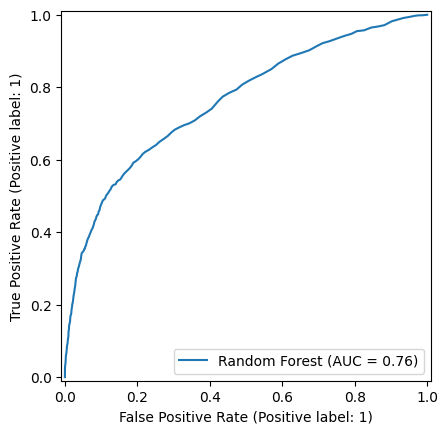

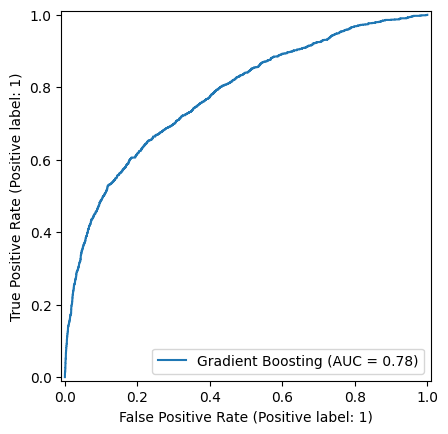

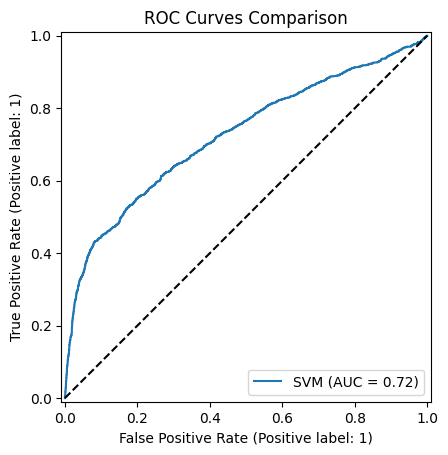


🏆 Best Model: Gradient Boosting


In [ ]:
X = df.drop("Y", axis=1)
y = df["Y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    if name in ["SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
print("\n=== Model Performance Summary ===")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (name, model) in zip(axes, models.items()):
    if name in ["SVM", "Logistic Regression"]:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
    ax.set_title(f"{name} - Confusion Matrix")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
for name, model in models.items():
    if name in ["SVM", "Logistic Regression"]:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves Comparison")
plt.show()

best_model_name = results_df.sort_values(by="ROC-AUC", ascending=False).iloc[0]["Model"]
print(f"\n🏆 Best Model: {best_model_name}")


**10. Hyperparameter Tuning**

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Assignments/ML_PROJECT-OCT/default-of-credit-card-clients.csv'
df = pd.read_csv(file_path, delimiter=',', skiprows=[1])
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X15    X16  \
0           1   20000   2   2   1  24   2   2  -1  -1  ...      0      0   
1           2  120000   2   2   2  26  -1   2   0   0  ...   3272   3455   
2           3   90000   2   2   2  34   0   0   0   0  ...  14331  14948   
3           4   50000   2   2   1  37   0   0   0   0  ...  28314  28959   
4           5   50000   1   2   1  57  -1   0  -1   0  ...  20940  19146   

     X17   X18    X19    X20   X21   X22   X23  Y  
0      0     0    689      0     0     0     0  1  
1   3261     0   1000   1000  1000     0  2000  1  
2  15549  1518   1500   1000  1000  1000  5000  0  
3  29547  2000   2019   1200  1100  1069  1000  0  
4  19131  2000  36681  10000  9000   689   679  0  

[5 rows x 25 columns]


In [ ]:
X = df.drop("Y", axis=1)
y = df["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 15],
    'min_samples_split': [2, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Accuracy: 0.8204583333333332
Test Accuracy: 0.8198333333333333


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20)
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

best_rf_random = random_search.best_estimator_
y_pred = best_rf_random.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': 12, 'min_samples_split': 17, 'n_estimators': 882}
Best CV Accuracy: 0.8202916666666668
Test Accuracy: 0.8208333333333333


In [ ]:
rf_manual = RandomForestClassifier(
    n_estimators=250,
    max_depth=12,
    min_samples_split=4,
    random_state=42
)
rf_manual.fit(X_train_scaled, y_train)
y_pred_manual = rf_manual.predict(X_test_scaled)

print("Manual Tuning Accuracy:", accuracy_score(y_test, y_pred_manual))
print(classification_report(y_test, y_pred_manual))

Manual Tuning Accuracy: 0.8211666666666667
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



**12. Model Development**

In [7]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Assignments/ML_PROJECT-OCT/default-of-credit-card-clients.csv'
df = pd.read_csv(file_path, delimiter=',', skiprows=[1])
print(df.head())

data = pd.read_csv(file_path, delimiter=',', skiprows=[1])
data.rename(columns={'Y': 'default'}, inplace=True)

X = data.drop(columns=['default', 'Unnamed: 0'])
y = data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

with open('credit_default_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as credit_default_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X15    X16  \
0           1   20000   2   2   1  24   2   2  -1  -1  ...      0      0   
1           2  120000   2   2   2  26  -1   2   0   0  ...   3272   3455   
2           3   90000   2   2   2  34   0   0   0   0  ...  14331  14948   
3           4   50000   2   2   1  37   0   0   0   0  ...  28314  28959   
4           5   50000   1   2   1  57  -1   0  -1   0  ...  20940  19146   

     X17   X18    X19    X20   X21   X22   X23  Y  
0      0     0    689      0     0     0     0  1  
1   3261     0   1000   1000  1000     0  2000  1  
2  15549  1518   1500   1000  1000  1000  5000  0  
3  29547  2000   2019   1200  1100  1069  1000  0  
4  19131  2000  36681  10000  9000   689   679  0  

[5 rows x 25 columns]
              precision    recall  f1-score   support

           0       0.84 

In [8]:
from flask import Flask, render_template, request
import pickle
import numpy as np
import pandas as pd

app = Flask(__name__)

with open('credit_default_model.pkl', 'rb') as f:
    model = pickle.load(f)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        features = [float(x) for x in request.form.values()]
        input_data = np.array(features).reshape(1, -1)

        prediction = model.predict(input_data)[0]

        result = "⚠️ High Risk of Default" if prediction == 1 else "✅ Low Risk of Default"
        return render_template('index.html', prediction_text=f"Prediction: {result}")

    except Exception as e:
        return render_template('index.html', prediction_text=f"Error: {str(e)}")

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [13]:
%%writefile index.html
<!DOCTYPE html>
<html>
<head>
    <title>Credit Default Prediction</title>
    <style>
        body { font-family: Arial; margin: 50px; background-color: #f9f9f9; }
        h2 { color: #333; }
        form { background: white; padding: 20px; border-radius: 8px; width: 400px; }
        input { margin: 5px 0; width: 100%; padding: 8px; }
        button { background: #007bff; color: white; padding: 10px; border: none; border-radius: 4px; }
        p { font-weight: bold; color: #333; }
    </style>
</head>
<body>
    <h2>Credit Default Prediction</h2>
    <form action="/predict" method="post">
        <label>LIMIT_BAL:</label><input type="text" name="LIMIT_BAL">
        <label>AGE:</label><input type="text" name="AGE">
        <label>PAY_0:</label><input type="text" name="PAY_0">
        <label>BILL_AMT1:</label><input type="text" name="BILL_AMT1">
        <label>PAY_AMT1:</label><input type="text" name="PAY_AMT1">
        <!-- Add more fields if desired -->
        <button type="submit">Predict</button>
    </form>

    {% if prediction_text %}
    <p>{{ prediction_text }}</p>
    {% endif %}
</body>
</html>

Writing index.html


**13. Conclusion**

The model correctly classifies around 82% of clients.

It's more accurate at predicting non-defaulters.

**Practical Use of the Model.**

For assessing credit risk.
Improve decision making.
Prioritize follow-up.
Reduce financial loss.

**Possible Improvements**

| Area                    | Suggested Improvement                                          | Purpose                                        |
| ----------------------- | -------------------------------------------------------------- | ---------------------------------------------- |
| **Feature Engineering** | Include interaction terms or ratios (e.g., `BILL_AMT/PAY_AMT`) | Capture behavioral patterns                    |
| **Data Balancing**      | Use SMOTE or class-weight balancing                            | Handle class imbalance                         |
| **Model Tuning**        | Use GridSearchCV or Bayesian Optimization                      | Improve accuracy and recall                    |
| **Advanced Models**     | Try XGBoost, LightGBM, or Neural Networks                      | Capture complex nonlinear relationships        |
| **Feature Importance**  | Apply SHAP or LIME analysis                                    | Increase explainability for business decisions |
| **Deployment**          | Integrate into a Flask/Django API or dashboard                 | Enable real-time predictions for loan officers |


**14. References**

**Data Source**

UCI Machine Learning Repository:

Default of Credit Card Clients Data Set

Original paper: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients.

**Research Paper Reference:**

Yeh, I. C., & Lien, C. H. (2009).
The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients.